### Задача 1. Визначення обсягу можливого фінансування інвестиційного проекту
i – номер студента в таблиці з оцінками на Гугл-диску, у моєму випадку **i = 10**

Відомо, що у фінансуванні проекту беруть участь п’ять фінансових установ, про які відомо таке:\
**Установа А** надійна і стабільна, сума фінансування складе 300+10i у.о.\
**Установа Б** надійна, але сума фінансування залежить від часу надання коштів. Так, з повною впевненістю можна стверджувати про те, що сума фінансування складе від 250+10i до 400+10i у.о., причому найбільш можливо одержати суму від 300+5i до 350+10i у.о.\
**Установа В** планує фінансування проекту в сумі 200-300 у.о. із збільшенням впевненості в наданні суми з ростом обсягу виплати.\
**Установу  Г**  визначають  як  нестабільну, але із можливістю надання значних сум коштів. Так, існує значна впевненість в тому, що проект буде профінансовано, зокрема в обсязі 200+10i-240+10i у.о., але більш надійно одержати 210-220 у.о.\
**Установа Д** ненадійна і нестабільна, проект напевне не фінансуватиме, але якщо надасть кошти, то в обсязі 300+5i-500+5i у.о. із зменшенням упевненості в одержанні коштів із зростанням їх суми.\
\
Визначити, найбільш можливу суму фінансування, неможливі обсяги фінансування, тощо.


In [36]:
%matplotlib inline

import matplotlib.pyplot as plt

In [5]:
from collections import namedtuple

fuzzyInterval = namedtuple("fuzzyInterval", ["left_mode", "right_mode", "alpha", "beta", "height"])

In [125]:
fuzzyValues = [
    [fuzzyInterval(400, 400, 0, 0, 1)], 
    [fuzzyInterval(350, 450, 0, 50, 1)], 
    [fuzzyInterval(300, 300, 100, 0, 1)], 
    [fuzzyInterval(0, 0, 0, 0, 0.1), fuzzyInterval(210, 220, 0, 0, 0.7), fuzzyInterval(300, 340, 0, 0, 0.2)], 
    [fuzzyInterval(0, 0, 0, 0, 0.9), fuzzyInterval(210, 210, 0, 10, 0.1)], 
]

Результатом операції $M_i \bigoplus M_j$, де $M_i, M_j$ - трапецієвидні нечіткі інтервали\
буде новий трапецієвидний нечіткий інтервал з параметрами:\
$(\underline{m}, \bar{m}, \alpha, \beta, h)$, де $h = min(h_i, h_j)$, $\alpha = h (\frac{\alpha_i}{h_i} + \frac{\alpha_j}{h_j})$, $\beta = h (\frac{\beta_i}{h_i} + \frac{\beta_j}{h_j})$, $\underline{m} = \underline{m}_i + \underline{m}_j - \alpha_i - \alpha_j + \alpha$, $\bar{m} = \bar{m}_i + \bar{m}_j+\beta_i +\beta_j - \beta$

In [33]:
def add_values(x, y):
    h = min(x.height, y.height)
    alpha, beta = h * (x.alpha / x.height + y.alpha / y.height), h * (x.beta / x.height + y.beta / y.height)
    ml = x.left_mode + y.left_mode - x.alpha - y.alpha + alpha
    mr = x.right_mode + y.right_mode + x.beta + y.beta - beta
    return fuzzyInterval(ml, mr, alpha, beta, h)

In [59]:
# def get_resulting_sets(values, i=0, j=0, result=None):
#     if i == 0:
#         result = values[i][j]
#     if i < len(values) - 1:
#         for k in range(len(values[i+1])):
#             get_resulting_sets(values, i+1, k, add_values(result, values[i+1][k]))
#     else:
#         lst.append(result)

def get_resulting_sets(values, lst_res, i=0, j=0, result=None):
    if i == 0:
        result = values[i][j]
    if i < len(values) - 1:
        for k in range(len(values[i+1])):
            get_resulting_sets(values, lst_res, i+1, k, add_values(result, values[i+1][k]))
    else:
        lst_res.append(result)

In [53]:
def plot(ax, fuzzyValue):
    left_mode, right_mode = fuzzyValue.left_mode, fuzzyValue.right_mode
    alpha, beta, height = fuzzyValue.alpha, fuzzyValue.beta, fuzzyValue.height
    xs, ys = [left_mode - alpha, left_mode, right_mode, right_mode + beta], [0, height,  height, 0]
    ax.plot(xs, ys, "-")
    return xs

#### test example

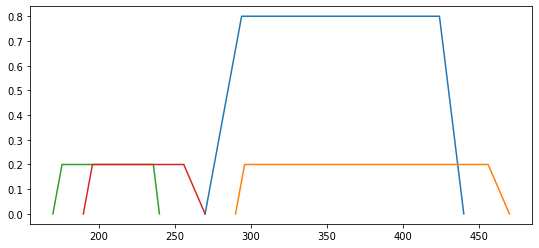

[fuzzyInterval(left_mode=294.0, right_mode=424.0, alpha=24.0, beta=16.0, height=0.8),
 fuzzyInterval(left_mode=296.0, right_mode=456.0, alpha=6.0, beta=14.0, height=0.2),
 fuzzyInterval(left_mode=176.0, right_mode=236.0, alpha=6.0, beta=4.0, height=0.2),
 fuzzyInterval(left_mode=196.0, right_mode=256.0, alpha=6.0, beta=14.0, height=0.2)]

In [62]:
testFuzzyValues = [
    [fuzzyInterval(100, 100, 0, 0, 1)], 
    [fuzzyInterval(100, 120, 30, 20, 1)], 
    [fuzzyInterval(100, 200, 0, 0, 0.8), fuzzyInterval(0, 0, 0, 0, 0.2)], 
    [fuzzyInterval(0, 0, 0, 0, 0.8), fuzzyInterval(20, 20, 0, 10, 0.2)], 
]

testIntervals = []
get_resulting_sets(testFuzzyValues, testIntervals)

fig, ax = plt.subplots(figsize=(9, 4))


for interval in testIntervals:
    plot(ax, interval)
plt.show()

testIntervals

#### actual task

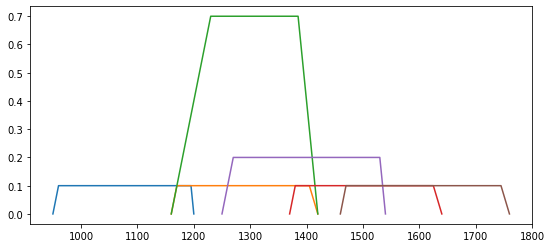

[fuzzyInterval(left_mode=960.0, right_mode=1195.0, alpha=10.0, beta=5.0, height=0.1),
 fuzzyInterval(left_mode=1170.0, right_mode=1405.0, alpha=10.0, beta=15.0, height=0.1),
 fuzzyInterval(left_mode=1230.0, right_mode=1385.0, alpha=70.0, beta=35.0, height=0.7),
 fuzzyInterval(left_mode=1380.0, right_mode=1625.0, alpha=10.0, beta=15.0, height=0.1),
 fuzzyInterval(left_mode=1270.0, right_mode=1530.0, alpha=20.0, beta=10.0, height=0.2),
 fuzzyInterval(left_mode=1470.0, right_mode=1745.0, alpha=10.0, beta=15.0, height=0.1)]

In [116]:
intervals = []
get_resulting_sets(fuzzyValues, intervals)

fig, ax = plt.subplots(figsize=(9, 4))

for interval in intervals:
    plot(ax, interval)
plt.show()

intervals

Бачимо, що найбільш імовірним э варіант отримати фінансування в діапазоні \[1230.0, 1385.0\]\
В той час як загальний діапазон імовірного фінансування \[950.0, 1760.0\]

### Задача 2. Нечітке логічне виведення
Нехай базу знань складають два правила:\
$P_1$ якщо $x \in A_1$ і $y \in B_1$ то $z \in C_1$\
$P_2$ якщо $x \in A_2$ і $y \in B_2$ то $z \in C_2$\
де $A_1, A_2, B_1, B_2, C_1, C_2$ − нечіткі множини із трапецієподібними функціями належності \
$\mu_{A_1}=\langle 100, 200, 30, 40, 1\rangle$, 
$\mu_{A_2}=\langle 200, 300, 20, 60, 1\rangle$,\
$\mu_{B_1}=\langle 140, 240, 30, 40, 1\rangle$,
$\mu_{B_2}=\langle 240, 320, 50, 40, 1\rangle$,\
$\mu_{C_1}=\langle 50, 100, 10, 30, 1\rangle$,
$\mu_{C_2}=\langle 100, 150, 20, 50, 1\rangle$

Знайти $z_0$, якщо $x_0 = 220$ і $y_0 = 200$\
Використати **виведення Мамдані** 


<img src="images/mamdani1.png" width=600 height=600 />

<img src="images/mamdani2.png" width=600 height=600 />

In [91]:
def mu4x(x, fuzzy_set):
    ml, mr, a, b, h = fuzzy_set.left_mode, fuzzy_set.right_mode, fuzzy_set.alpha, fuzzy_set.beta, fuzzy_set.height
    if (x <= ml - a) or (x >= mr + b):
        return 0
    elif ml <= x <= mr:
        return h
    elif ml - a < x < ml:
        return (x - ml) / a * h + h
    else:
        return -(x - mr) / b * h + h
    
    
def x4mu(mu, fuzzy_set):
    ml, mr, a, b, h = fuzzy_set.left_mode, fuzzy_set.right_mode, fuzzy_set.alpha, fuzzy_set.beta, fuzzy_set.height
    if mu == 0:
        return None
    elif mu == h:
        return (ml, mr)
    else:
        left_x = (mu - h) / h * a + ml
        right_x = -(mu - h) / h * b + mr
        return (left_x, right_x)

In [65]:
fuzzy_sets = {
    "A1": fuzzyInterval(100,200,30,40,1),
    "A2": fuzzyInterval(200,300,20,60,1),
    "B1": fuzzyInterval(140,240,30,40,1),
    "B2": fuzzyInterval(240,320,50,40,1),
    "C1": fuzzyInterval(50,100,10,30,1),
    "C2": fuzzyInterval(100,150,20,50,1),
}

In [86]:
x0, y0 = 220, 200

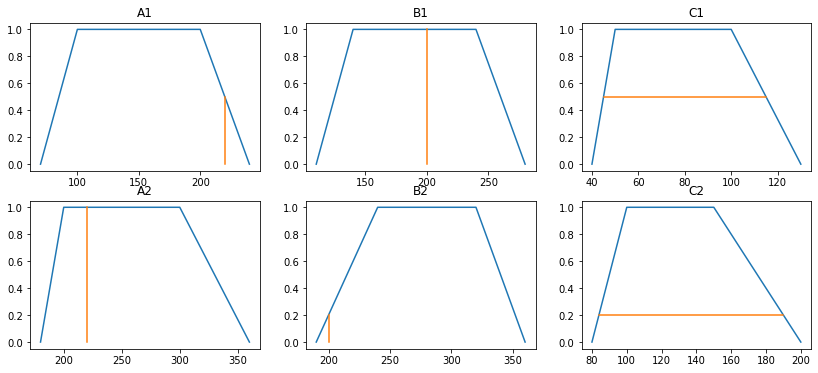

In [108]:
fig, ax = plt.subplots(2, 3, figsize=(14, 6))

mu_a1, mu_b1 = mu4x(x0, fuzzy_sets["A1"]), mu4x(y0, fuzzy_sets["B1"])
y_c1 = min(mu_a1, mu_b1)
x_c1 = x4mu(x_c1, fuzzy_sets["C1"])


mu_a2, mu_b2 = mu4x(x0, fuzzy_sets["A2"]), mu4x(y0, fuzzy_sets["B2"])
y_c2 = min(mu_a2, mu_b2)
x_c2 = x4mu(x_c2, fuzzy_sets["C2"])



plot(ax[0][0], fuzzy_sets["A1"]); ax[0][0].plot([x0, x0], [0, mu_a1])
plot(ax[0][1], fuzzy_sets["B1"]); ax[0][1].plot([y0, y0], [0, mu_b1])
plot(ax[0][2], fuzzy_sets["C1"]); ax[0][2].plot(x_c1, [y_c1, y_c1])
ax[0][0].set_title("A1"); ax[0][1].set_title("B1"); ax[0][2].set_title("C1")

plot(ax[1][0], fuzzy_sets["A2"]); ax[1][0].plot([x0, x0], [0, mu_a2])
plot(ax[1][1], fuzzy_sets["B2"]); ax[1][1].plot([y0, y0], [0, mu_b2])
plot(ax[1][2], fuzzy_sets["C2"]); ax[1][2].plot(x_c2, [y_c2, y_c2])
ax[1][0].set_title("A2"); ax[1][1].set_title("B2"); ax[1][2].set_title("C2")

plt.show()

In [109]:
C1 = fuzzy_sets["C1"]
left, right = x_c1
C1_modified = fuzzyInterval(left, right, left - C1.left_mode + C1.alpha, C1.right_mode + C1.beta - right, y_c1)

C2 = fuzzy_sets["C2"]
left, right = x_c2
C2_modified = fuzzyInterval(left, right, left - C2.left_mode + C2.alpha, C2.right_mode + C2.beta - right, y_c2)

In [111]:
C1_modified, C2_modified

(fuzzyInterval(left_mode=45.0, right_mode=115.0, alpha=5.0, beta=15.0, height=0.5),
 fuzzyInterval(left_mode=84.0, right_mode=190.0, alpha=4.0, beta=10.0, height=0.19999999999999996))

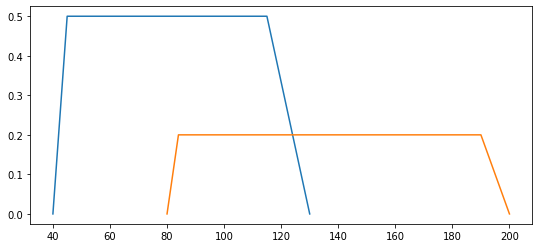

In [112]:
fig, ax = plt.subplots(figsize=(9, 4))

plot(ax, C1_modified)
plot(ax, C2_modified)
plt.show()

$Z_0 = \displaystyle \frac{\int_\underline{z}^\bar{z} z\mu_\theta (z)dz}{\int_\underline{z}^\bar{z} \mu_\theta (z)dz}$

In [115]:
intersection_point = x4mu(0.2, C1_modified)[1]
intersection_point

124.0

In [117]:
# 5 * 0.5 / 2 + (115 - 45) * 0.5 + (0.5 + 0.2) / 2 * (124 - 115) + 0.2 * (190 - 124) + 10 * 0.2 / 2

53.6

In [124]:
# ((115 ** 2 - 45 ** 2) / 4 + (190 ** 2 - 124 ** 2) / 10 + 45 ** 3 / 30 - 40 ** 3 / 30 - 45 ** 2 * 2 + 40 ** 2 * 2 - 0.1 / 9 * 124 ** 3 + 4.333 / 2 * 124 ** 2 + 0.1 /9 * 115 ** 3 - 4.333 / 2 * 115 ** 2 - 2 / 300 * 200 ** 3 + 2 / 300 * 190 ** 3 + 2 * 200 ** 2 - 2 * 190 ** 2)/ 53.6



102.49890858208957

#### Відповідь: $Z_0 = 102.5$